## <span style="color: yellow;"><b>Baseline on Merged Dataset</b></span>

## <span style="color: yellow;"><b>Import</b></span>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier



<span style="color: yellow;"><b>Data from CSV</b></span>

In [13]:
data = pd.read_csv('data/merged_data.csv')

In [14]:
len(data)

426705

In [15]:
data.columns

Index(['id', 'comment_text', 'severe_toxicity', 'obscene', 'identity_attack',
       'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist',
       'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count', 'toxicity',
       'toxic'],
      dtype='object')

In [16]:
data['toxic'] = (data['toxicity'] >= 0.5).astype(int)


<span style="color: yellow;"><b>Bag of Words + Logistic Regression</b></span>

In [17]:
# using comment_text and toxic

X = data['comment_text'].fillna('') 
y = data['toxic']

# split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# convert to BoW

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [19]:
# logistic regression
log_reg_bow = LogisticRegression(random_state=42,max_iter=1000) 
log_reg_bow.fit(X_train_bow, y_train)

# prediction

y_pred_bow = log_reg_bow.predict(X_test_bow)


/Users/purviparmar/Documents/NeueFischeRepository/lexiguards/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
accuracy = accuracy_score(y_test, y_pred_bow)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_bow))

Accuracy: 0.9137
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     75625
           1       0.69      0.45      0.54      9716

    accuracy                           0.91     85341
   macro avg       0.81      0.71      0.75     85341
weighted avg       0.90      0.91      0.91     85341



<span style="color: yellow;"><b>Confusion Matrix</b></span>

Confusion matrix: [[73655  1970]
 [ 5392  4324]]


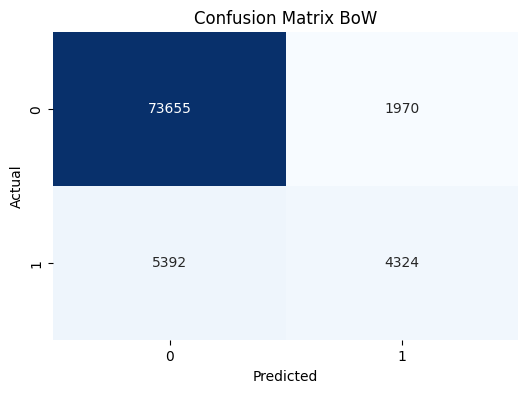

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred_bow)
print(f'Confusion matrix: {conf_matrix}')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BoW')
plt.show()

<span style="color: yellow;"><b>TF-IGF + Logistic Regression</b></span>

In [22]:
# using comment_text and toxic

X1 = data['comment_text'].fillna('') 
y1 = data['toxic']

# split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [23]:
# conver to TF-IGF

tfidf_vectorizer = TfidfVectorizer()
X1_train_tfidf = tfidf_vectorizer.fit_transform(X1_train)
X1_test_tfidf = tfidf_vectorizer.transform(X1_test)

In [24]:
# logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X1_train_tfidf, y1_train)

# prediction
y1_pred = log_reg.predict(X1_test_tfidf)

/Users/purviparmar/Documents/NeueFischeRepository/lexiguards/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy TF-IGF: {accuracy1:.4f}")
print(classification_report(y1_test, y1_pred))

Accuracy TF-IGF: 0.9167
              precision    recall  f1-score   support

           0       0.93      0.99      0.95     75625
           1       0.77      0.38      0.51      9716

    accuracy                           0.92     85341
   macro avg       0.85      0.68      0.73     85341
weighted avg       0.91      0.92      0.90     85341



<span style="color: yellow;"><b>Confusion Matrix</b></span>

Confusion matrix: [[74537  1088]
 [ 6023  3693]]


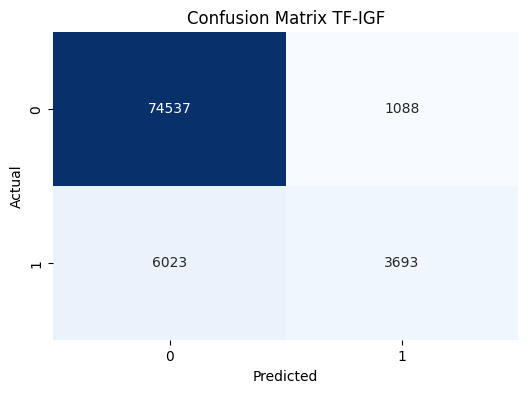

In [26]:
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
print(f'Confusion matrix: {conf_matrix1}')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix TF-IGF')
plt.show()

### <span style="color: yellow;"><b>Dummy Classifier</b></span>

In [27]:
X2 = data['comment_text'].fillna('') 
y2 = data['toxic']

# split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [28]:
# dummy classifier
dummy_clf = DummyClassifier(strategy="stratified")  # You can change strategy if needed
dummy_clf.fit(X2_train, y2_train)

DummyClassifier(strategy='stratified')

In [29]:
y2_pred = dummy_clf.predict(X2_test)

In [30]:
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f"Accuracy Dummy Classifier: {accuracy1:.4f}")
print(classification_report(y2_test, y2_pred))

Accuracy Dummy Classifier: 0.9167
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     75625
           1       0.11      0.11      0.11      9716

    accuracy                           0.80     85341
   macro avg       0.50      0.50      0.50     85341
weighted avg       0.80      0.80      0.80     85341



<span style="color: yellow;"><b>Confusion Matrix: Dummy Classifier</b></span>

Confusion matrix: [[67149  8476]
 [ 8619  1097]]


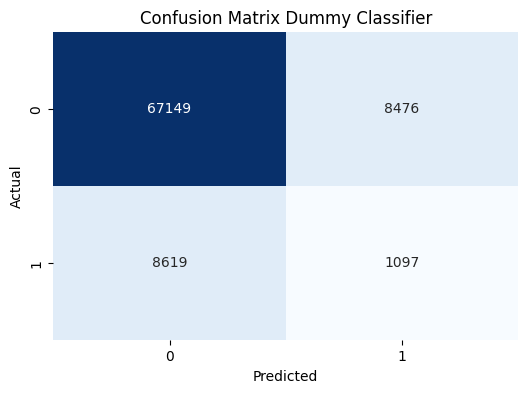

In [31]:
conf_matrix_dcl = confusion_matrix(y2_test, y2_pred)
print(f'Confusion matrix: {conf_matrix_dcl}')
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dcl, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Dummy Classifier')
plt.show()